In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [60]:
data = pd.read_csv('C:\Md Shahid\GitRepo\Iris_DataSet\Data Sets\diabetes.csv')

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
data.isnull().value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI    DiabetesPedigreeFunction  Age    Outcome
False        False    False          False          False    False  False                     False  False      768
Name: count, dtype: int64

In [10]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

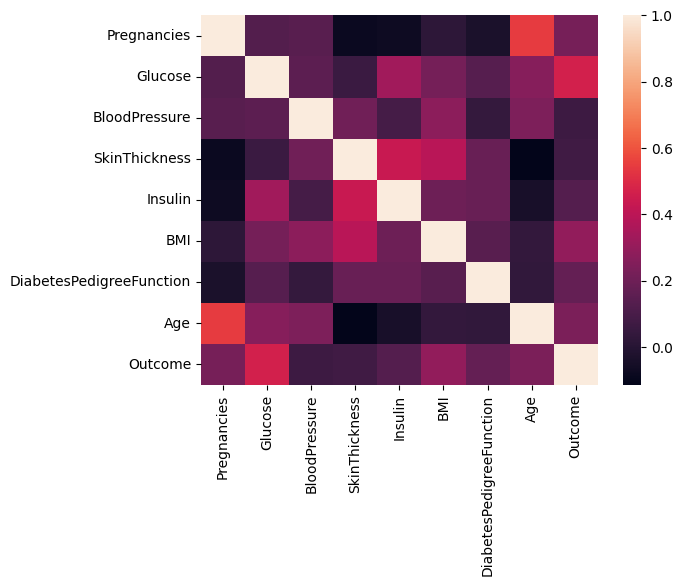

In [ ]:
import seaborn as sns
sns.heatmap(data.corr())

In [15]:
data.shape

(768, 9)

In [16]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [17]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [23]:
x = data.drop('Outcome', axis=1)
y = data['Outcome']

In [26]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

In [27]:
x = scalar.fit_transform(x)


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [29]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=20,random_state=32,stratify=y)

In [31]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((748, 8), (20, 8), (748,), (20,))

In [30]:
model = SVC(kernel='linear')
model.fit(xtrain,ytrain)

SVC(kernel='linear')

In [32]:
ypred = model.predict(xtest)

In [34]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [36]:
print(classification_report(ytest,y_pred=ypred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       1.00      0.71      0.83         7

    accuracy                           0.90        20
   macro avg       0.93      0.86      0.88        20
weighted avg       0.91      0.90      0.90        20



In [37]:
print(accuracy_score(y_pred=ypred,y_true=ytest))

0.9


In [38]:

print(confusion_matrix(y_pred=ypred,y_true=ytest))

[[13  0]
 [ 2  5]]


In [63]:
import pickle
with open('C:\Md Shahid\GitRepo\Iris_DataSet\models\svm_model.pkl', 'wb') as file:
    pickle.dump(model, file)

import pickle
with open('C:\Md Shahid\GitRepo\Iris_DataSet\models\scaler.pkl', 'wb') as file:
    pickle.dump(scalar, file)

In [64]:
input_ = np.array([2,197,70,45,543,30.5,0.158,5]).reshape(1,-1)

with open('C:\Md Shahid\GitRepo\Iris_DataSet\models\svm_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

with open('C:\Md Shahid\GitRepo\Iris_DataSet\models\scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

input_ = scaler.transform(input_)

new_predictions = loaded_model.predict(input_)

if new_predictions == 0:
    print("No diabetes")
else:
    print('Have diabetes')


Have diabetes
